In [1]:
import requests as rq
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt

In [2]:
def get_status_name(status_code):
    status_codes = {
        100: "Continue",
        101: "Switching Protocols",
        200: "OK",
        201: "Created",
        202: "Accepted",
        203: "Non-Authoritative Information",
        204: "No Content",
        205: "Reset Content",
        206: "Partial Content",
        300: "Multiple Choices",
        301: "Moved Permanently",
        302: "Found",
        303: "See Other",
        304: "Not Modified",
        305: "Use Proxy",
        307: "Temporary Redirect",
        400: "Bad Request",
        401: "Unauthorized",
        402: "Payment Required",
        403: "Forbidden",
        404: "Not Found",
        405: "Method Not Allowed",
        406: "Not Acceptable",
        407: "Proxy Authentication Required",
        408: "Request Timeout",
        409: "Conflict",
        410: "Gone",
        411: "Length Required",
        412: "Precondition Failed",
        413: "Request Entity Too Large",
        414: "Request-URI Too Long",
        415: "Unsupported Media Type",
        416: "Requested Range Not Satisfiable",
        417: "Expectation Failed",
        500: "Internal Server Error",
        501: "Not Implemented",
        502: "Bad Gateway",
        503: "Service Unavailable",
        504: "Gateway Timeout",
        505: "HTTP Version Not Supported"
    }
    
    return status_codes.get(status_code, "Unknown")


Get Gross Profit from Tesla financial statements using the SEC Edgar API.

In [3]:
# Need user agent info to access secs API.
headers = {'User-Agent': 'elijahworks@gmail.com'}

# CIK is an identification number for an company.
CIK = "0001318605"

# URL to Teslas financial statements
url = f"https://data.sec.gov/api/xbrl/companyfacts/CIK{CIK}.json"

# Request api to access to data. 
response = rq.get(url, headers=headers)

# Check if api gives acess to the data.
if response.status_code == 200:
     print("Access granted")
else: 
    print(get_status_name(response.status_code))
    print("Access NOT granted")

# Convert data to json format.
company_data = response.json()


print(f"Level One: {company_data.keys()}")
print(f"Level Two: {company_data['facts'].keys()}")
print(f"Level Three: {company_data['facts']['dei'].keys()}")
share_data = company_data['facts']['dei']
print()


print(f"Level One: {company_data.keys()}")
print(f"Level Two: {company_data['facts'].keys()}")
print(f"Level Three: {company_data['facts']['us-gaap'].keys()}")
# share_data = company_data['facts']['dei']


Company_data =  company_data['facts']['us-gaap']['SalesRevenueGoodsNet']['units']['USD']
pprint(Company_data)
for data in  Company_data:
    if Company_data['form'] == '10-K':
        pprint(data)


Access granted
Level One: dict_keys(['cik', 'entityName', 'facts'])
Level Two: dict_keys(['dei', 'us-gaap'])
Level Three: dict_keys(['EntityCommonStockSharesOutstanding', 'EntityPublicFloat'])

Level One: dict_keys(['cik', 'entityName', 'facts'])
Level Two: dict_keys(['dei', 'us-gaap'])
Level Three: dict_keys(['AccountsAndNotesReceivableNet', 'AccountsPayableCurrent', 'AccountsReceivableNetCurrent', 'AccretionAmortizationOfDiscountsAndPremiumsInvestments', 'AccrualForEnvironmentalLossContingencies', 'AccrualForEnvironmentalLossContingenciesPayments', 'AccruedEnvironmentalLossContingenciesCurrent', 'AccruedEnvironmentalLossContingenciesNoncurrent', 'AccruedLiabilitiesCurrent', 'AccumulatedDepreciationDepletionAndAmortizationPropertyPlantAndEquipment', 'AccumulatedOtherComprehensiveIncomeLossNetOfTax', 'AdditionalPaidInCapital', 'AdditionalPaidInCapitalCommonStock', 'AdjustmentsNoncashItemsToReconcileNetIncomeLossToCashProvidedByUsedInOperatingActivities', 'AdjustmentsToAdditionalPaidInC

TypeError: list indices must be integers or slices, not str

In [ ]:


# Need user agent info to access secs API.
headers = {'User-Agent': 'elijahworks@gmail.com'}

# CIK is an identification number for an company.
CIK = "0001318605"

# URL to Teslas financial statements
url = f"https://data.sec.gov/api/xbrl/companyfacts/CIK{CIK}.json"
# Request api to access to data. 
response = rq.get(url, headers=headers)

# Check if api gives acess to the data.
if response.status_code == 200: print("Access grated")
else: print("Access NOT granted")


years = []
gross_profit = []
revenues = []
net_incomes = []

concepts = ['Revenues', 'GrossProfit', 'NetIncomeLoss' ]
for concept in concepts:
    # Get Data into a JSON dictionary.
    company_data = response.json()
    concept_data = company_data['facts']['us-gaap'][concept]['units']['USD']

    for data in concept_data:
        for year in range(2016, 2023):
            try:
                if data['form'] == '10-K' and data['frame'] == f'CY{year}':
                    if concept == 'Revenues': 
                        years.append(year)
                        revenue = data['val']
                        revenues.append(revenue)
                        
                    elif concept == 'GrossProfit':
                        gross_profit.append(data['val'])
                    elif concept == 'NetIncomeLoss':
                        net_incomes.append(data['val'])
            except:
                pass

# Debugging
print("Year: ", end="")
for year in years: print(f"{year}, ", end="")
print()
print("Profit: ", end="")
for profit in gross_profit: print(f"{profit}, ", end="")
print()
print("revenue: ", end="")
for revenue in revenues: print(f"{revenue}, ", end="")
print()
print("Net Income: ", end='')
for income in net_incomes: print(f"{income}, ", end='')

In [ ]:
# Need user agent info to access secs API.
headers = {'User-Agent': 'elijahworks@gmail.com'}

# CIK is an identification number for an company.
CIK = "0001318605"

# URL to Teslas financial statements
url = f"https://data.sec.gov/api/xbrl/companyfacts/CIK{CIK}.json"
# Request api to access to data. 
response = rq.get(url, headers=headers)

# Check if api gives acess to the data.
if response.status_code == 200: print("Access grated")
else: print("Access NOT granted")


years = []
gross_profit = []
revenues = []
net_incomes = []

concepts = ['Revenues', 'GrossProfit', 'NetIncomeLoss']
for concept in concepts:
    # Get Data into a JSON dictionary.
    company_data = response.json()
    concept_data = company_data['facts']['us-gaap'][concept]['units']['USD']

    for data in concept_data:
        for year in range(2016, 2023):
            try:
                if data['form'] == '10-K' and data['frame'] == f'CY{year}':
                    if concept == 'Revenues': 
                        years.append(year)
                        revenue = data['val']
                        revenues.append(revenue)
                        
                    elif concept == 'GrossProfit':
                        gross_profit.append(data['val'])
                    elif concept == 'NetIncomeLoss':
                        net_incomes.append(data['val'])
            except:
                pass

# Debugging
print("Year: ", end="")
for year in years: print(f"{year}, ", end="")
print()
print("Profit: ", end="")
for profit in gross_profit: print(f"{profit}, ", end="")
print()
print("revenue: ", end="")
for revenue in revenues: print(f"{revenue}, ", end="")
print()
print("Net Income: ", end='')
for income in net_incomes: print(f"{income}, ", end='')

Access grated
Year: 2016, 2017, 2018, 2019, 2020, 2021, 2022, 
Profit: 1599257000, 2223000000, 4042000000, 4069000000, 6630000000, 13606000000, 20853000000, 
revenue: 7000132000, 11759000000, 21461000000, 24578000000, 31536000000, 53823000000, 81462000000, 
Net Income: -674914000, -1962000000, -976000000, -862000000, 721000000, 5519000000, 12556000000, 

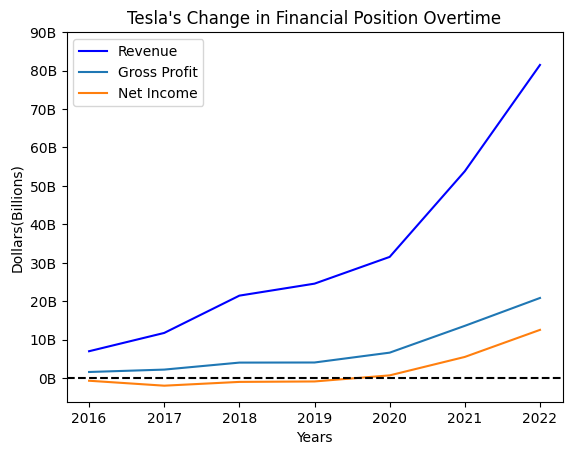

In [ ]:
# plt.plot(years, gross_profit)
plt.plot(years, revenues, color="blue", label="Revenue")
plt.plot(years, gross_profit, label="Gross Profit")
plt.plot(years, net_incomes, label="Net Income")
# plt.yticks([x for x in range(0, 10 * 10 ** 9, 10 ** 9)], [y for y in range(0, )])
plt.axhline(y=0, color="black", linestyle="dashed")
plt.yticks([0, 10 * 10 ** 9, 20 * 10 ** 9, 30 * 10 ** 9, 40 * 10 ** 9, 50 * 10 ** 9, 60 * 10 ** 9, 70 * 10 ** 9, 80 * 10 ** 9, 90 * 10 ** 9], ['0B', '10B', '20B','30B', '40B', '50B', '60B', '70B', '80B', '90B'])
plt.title("Tesla's Change in Financial Position Overtime")
plt.xlabel("Years")
plt.ylabel("Dollars(Billions)")
plt.legend()
plt.show()